<a href="https://colab.research.google.com/github/sandhyajnv/Digital-image-processing/blob/main/DIP_Assignment3_Q_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math 
import cv2
import os
import pandas as pd

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
def histogram_image(arr):
  
  arr=arr.flatten()
  n=len(arr)
  arr,count=np.unique(arr,return_counts=True)
  count=count/n
  return(arr,count)

In [ ]:
def histogram_equalization(arr):
  pixel,prob=histogram_image(arr)
  trans=[]
  for i in range(len(pixel)):
    c=0
    for j in range(i):
      c=c+prob[j]
    trans.append(c)
  trans=np.array(trans)
  transeq=np.int_((trans-np.min(trans))/(1-np.min(trans))*255+0.5)  
  cell_arrn=arr

  cell_arrn=cell_arrn.flatten()
  for i in range(len(pixel)):
    for j in range(len(cell_arrn)):
      if(cell_arrn[j]==pixel[i]):
        cell_arrn[j]=transeq[i]
  cell_arrn=cell_arrn.reshape(arr.shape)
  return(cell_arrn)


(300, 399, 3)


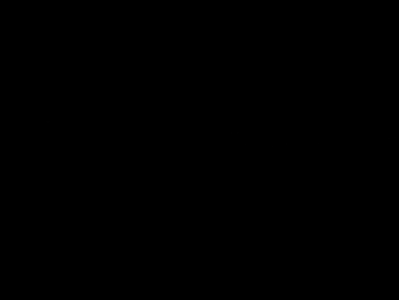

In [ ]:

cell_arr = mpimg.imread('/content/drive/MyDrive/Images_HWS-20230225T091550Z-001/Images_HWS/hist_equalization1.png')
print(cell_arr.shape)
cv2_imshow(cell_arr)

In [ ]:
min=np.min(cell_arr)
max=np.max(cell_arr)
min_range=0
max_range=255
print(min,max)
stretched_image=(cell_arr-min)*((max_range-min_range)/(max-min))


0.0 1.0


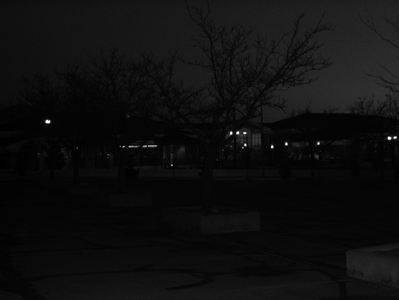

In [ ]:
cv2_imshow(stretched_image)

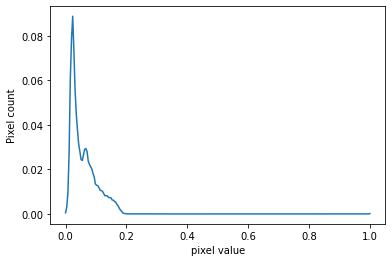

In [ ]:
arr,count=histogram_image(cell_arr)
plt.xlabel("pixel value")
plt.ylabel("Pixel count")
#plt.xticks(np.arange(min_range,max_range,10)
plt.plot(arr,count)

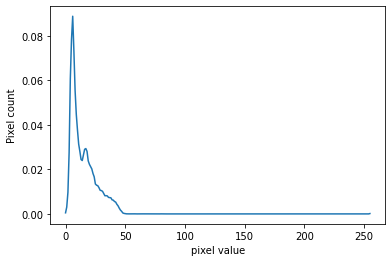

In [ ]:
arr,count=histogram_image(stretched_image)
plt.xlabel("pixel value")
plt.ylabel("Pixel count")
#plt.xticks(np.arange(min_range,max_range,10)
plt.plot(arr,count)

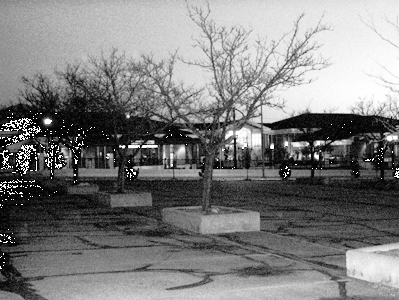

In [ ]:
cell_arrn=histogram_equalization(cell_arr)
cv2_imshow(cell_arrn)

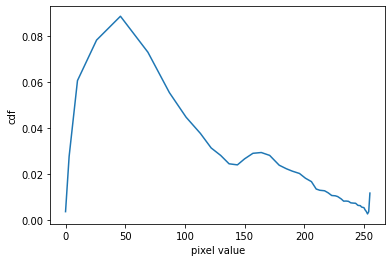

In [ ]:
pixeln,pr=histogram_image(cell_arrn)
plt.xlabel("pixel value")
plt.ylabel("cdf")
#plt.xticks(np.arange(min_range,max_range,10)
plt.plot(pixeln,pr)